In [5]:
#Import all the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor 

import warnings 
warnings.filterwarnings('ignore')


In [6]:
#Load the data using pandas
train = pd.read_csv('Housing_dataset_train.csv')
test = pd.read_csv('Housing_dataset_test.csv')
sub = pd.read_csv('Sample_submission.csv')
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [7]:
sub.head()

,ID
0,845
1,1924
2,10718
3,12076
4,12254


In [8]:
train.title.unique()

array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [9]:
#Check for the total number of rows and columns contained in the data
train.shape

(14000, 7)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [11]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [12]:
#Check for missing values
train.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

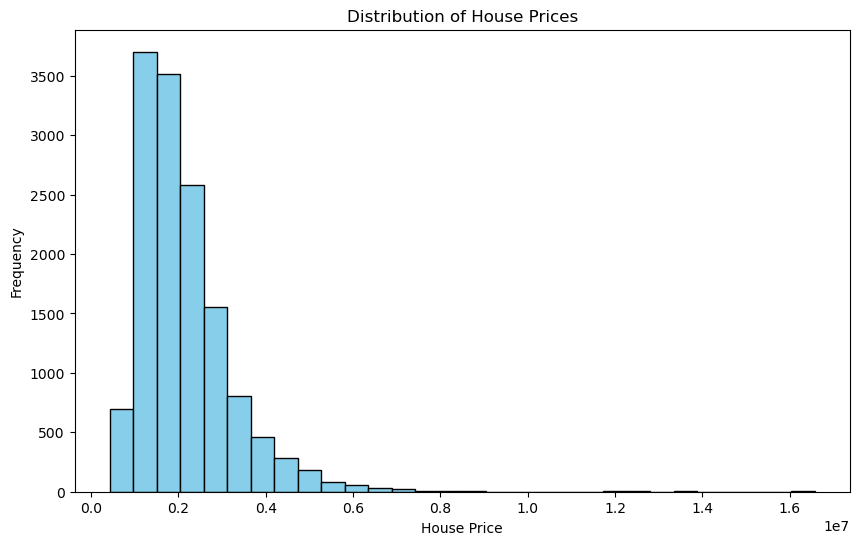

In [13]:
# Visualize the distribution using a histogram before cleaning the dataset 
House_prices = train['price']
plt.figure(figsize=(10, 6))
plt.hist(House_prices, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

In [14]:
# Check the percentage pf missing values in each columns 
(train.isnull().sum().sort_values(ascending= False)/len(train))*100

loc              12.950000
parking_space    12.935714
bathroom         12.892857
bedroom          12.850000
title            12.300000
ID                0.000000
price             0.000000
dtype: float64

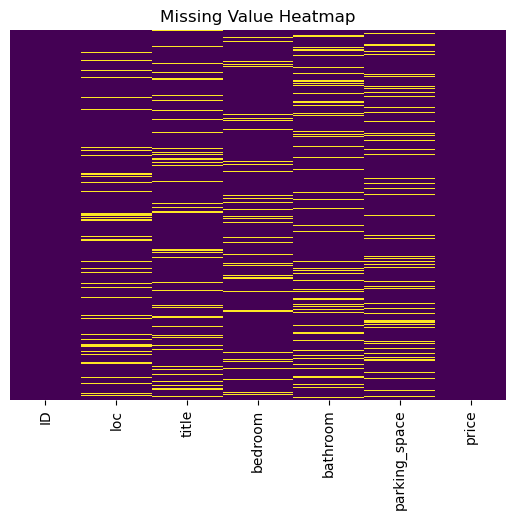

In [15]:
#View the missing values 
sns.heatmap(train.isnull(), cmap ='viridis', cbar= False, yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

In [16]:
#Find the mean and fill the missing values with forward fill to adjust the skewness of the data 
std_bedroom = train['bedroom'].std()
std_bathroom = train['bathroom'].std()



train['parking_space'].fillna(0, inplace = True) 
train['bedroom'].fillna(std_bedroom, inplace=True)
train['bathroom'].fillna(std_bathroom, inplace=True)

In [17]:
#Fill in the missing value with forward fill to adjust the skewness of the data 
col = ['loc', 'title']
for col in train:
    train[col].fillna(method = 'ffill', inplace= True)

In [18]:
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.000000,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,2.441165,2.0,4.0,1672416.689
2,9261,Ekiti,Apartment,7.000000,5.0,0.0,3364799.814
3,2224,Anambra,Detached duplex,5.000000,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,2.441165,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,2.441165,7.0,0.0,2367927.861
13996,9704,Kaduna,Apartment,2.441165,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.000000,6.0,5.0,2406812.693
13998,9256,Delta,Flat,2.441165,6.0,1.0,3348918.718


In [19]:
train.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [20]:
Distribution_of_house_types = train['title'].value_counts() #This estimates the distribution of house types 

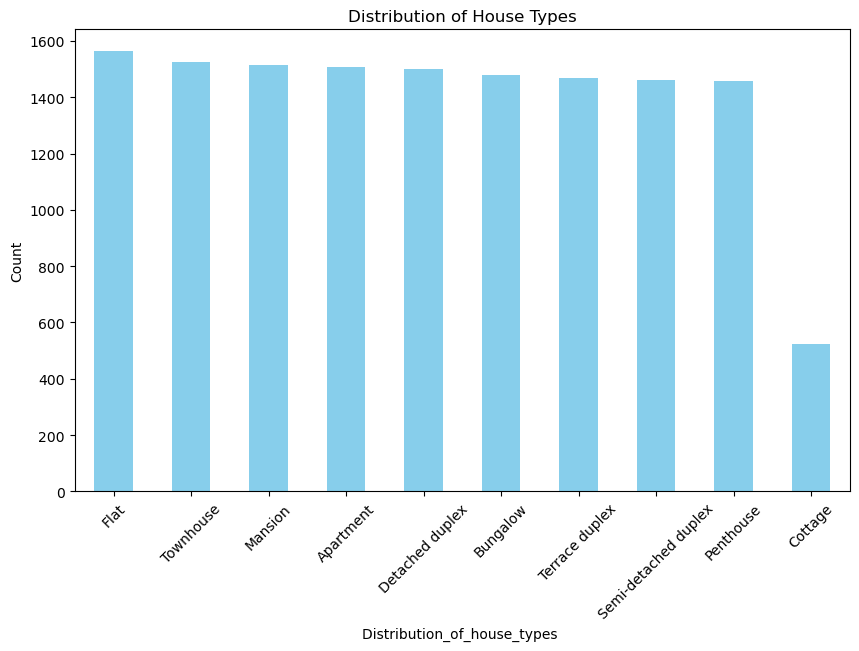

In [21]:
plt.figure(figsize=(10, 6))
Distribution_of_house_types.plot(kind='bar', color='skyblue')
plt.xlabel('Distribution_of_house_types ')
plt.ylabel('Count')
plt.title('Distribution of House Types')
plt.xticks(rotation=45)
plt.show()

In [22]:
#Finding the state with the highest number of houses
state_with_the_highest_houses = train['loc'].value_counts().idxmax()
print('The state with the highest number of house is:')
print(state_with_the_highest_houses)

The state with the highest number of house is:
Anambra


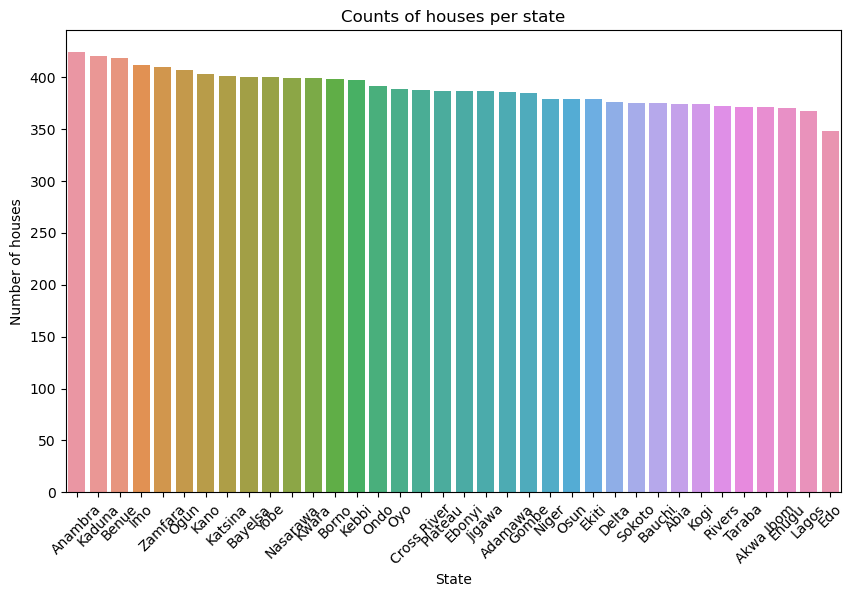

In [23]:
#Visualizing the state with the highest number of houses 
plt.figure(figsize=(10, 6))
sns.countplot(data= train, x = 'loc', order = train['loc'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Number of houses')
plt.title('Counts of houses per state')
plt.xticks(rotation=45)
plt.show()

In [24]:
House_type_by_location = train.groupby(['loc', 'title'])['loc'].count()
House_type_by_location

loc      title               
Abia     Apartment               50
         Bungalow                40
         Cottage                 14
         Detached duplex         34
         Flat                    36
                                 ..
Zamfara  Mansion                 44
         Penthouse               39
         Semi-detached duplex    42
         Terrace duplex          45
         Townhouse               45
Name: loc, Length: 360, dtype: int64

In [25]:
train['title'].unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [26]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.000000,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,2.441165,2.0,4.0,1672416.689
2,9261,Ekiti,Apartment,7.000000,5.0,0.0,3364799.814
3,2224,Anambra,Detached duplex,5.000000,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,2.441165,5.0,6.0,2600700.898


In [27]:
#Finding the average house price per state
Average_house_price_per_state = train.groupby(['loc','price'])['price'].mean()
Average_house_price_per_state.tail()

loc      price      
Zamfara  4115925.389    4115925.389
         4256606.042    4256606.042
         4331849.003    4331849.003
         4390262.659    4390262.659
         4487927.955    4487927.955
Name: price, dtype: float64

<AxesSubplot:xlabel='bathroom', ylabel='price'>

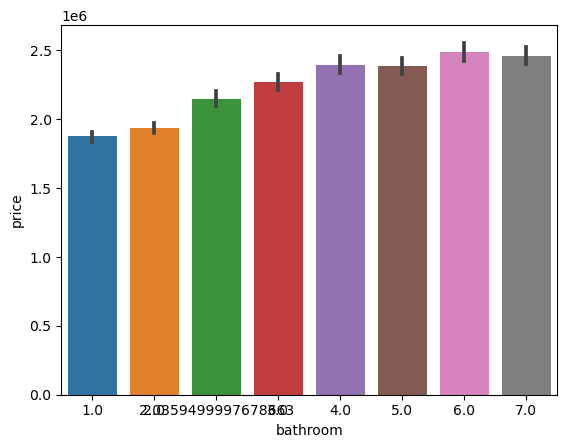

In [28]:
#Relationship between the house price and numbers of bathroom
sns.barplot(x= 'bathroom', y = 'price', data = train)

In [29]:
#Type of house with the highest average number of bathroom.


state_with_the_highest_houses = train['loc'].value_counts().idxmax()

<AxesSubplot:>

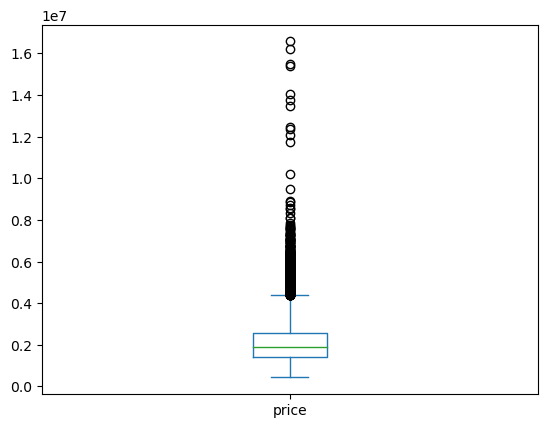

In [30]:
#Visulaize outliers in the house prices
train.plot.box(column = 'price') 

In [31]:
#Which house type has the highest average number of bathrooms?
average_bathroom_by_house_type = train.groupby(['title'])['bathroom'].mean() #calculates the average number of bathroom per house type
average_bathroom_by_house_type

title
Apartment               2.987050
Bungalow                3.143663
Cottage                 1.828300
Detached duplex         3.075096
Flat                    3.060971
Mansion                 3.032464
Penthouse               2.869405
Semi-detached duplex    3.016472
Terrace duplex          3.147262
Townhouse               3.005303
Name: bathroom, dtype: float64

In [32]:
highest_average_bathroom_by_house_type = average_bathroom_by_house_type.idxmax() #calcuates the house type with the highest average number of 
highest_average_bathroom_by_house_type
print(f"The house type with the highest average number of bathroom is: {highest_average_bathroom_by_house_type}")

The house type with the highest average number of bathroom is: Terrace duplex


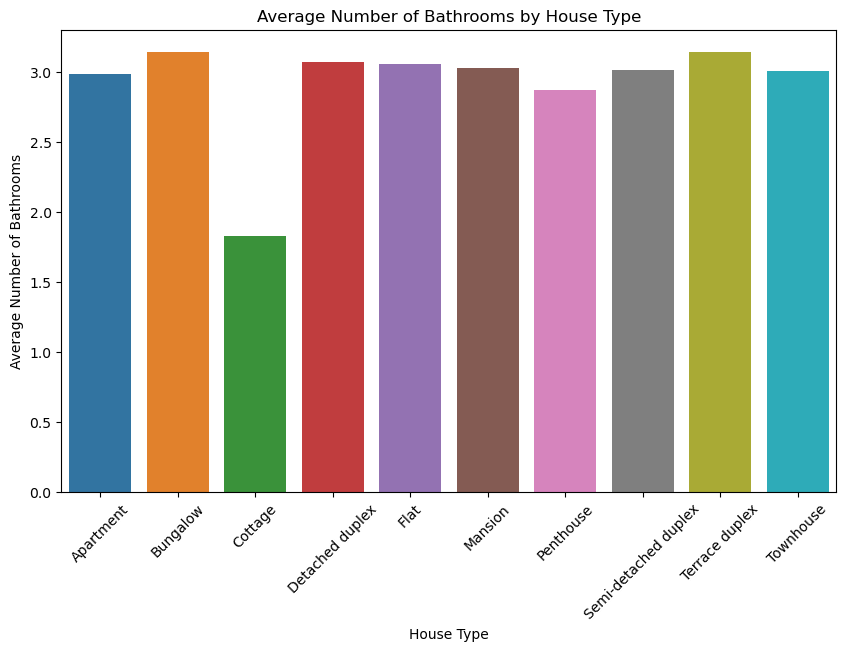

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_bathroom_by_house_type.index, y=average_bathroom_by_house_type.values)
plt.xlabel('House Type')
plt.ylabel('Average Number of Bathrooms')
plt.title('Average Number of Bathrooms by House Type')
plt.xticks(rotation=45)
plt.show()

In [34]:
#extract the price, bathroom and bedroom columns
train[['price', 'bathroom', 'bedroom']]

,price,bathroom,bedroom
0,1149999.565,2.0,2.000000
1,1672416.689,2.0,2.441165
2,3364799.814,5.0,7.000000
3,2410306.756,2.0,5.000000
4,2600700.898,5.0,2.441165
...,...,...,...
13995,2367927.861,7.0,2.441165
13996,2228516.471,7.0,2.441165
13997,2406812.693,6.0,8.000000
13998,3348918.718,6.0,2.441165


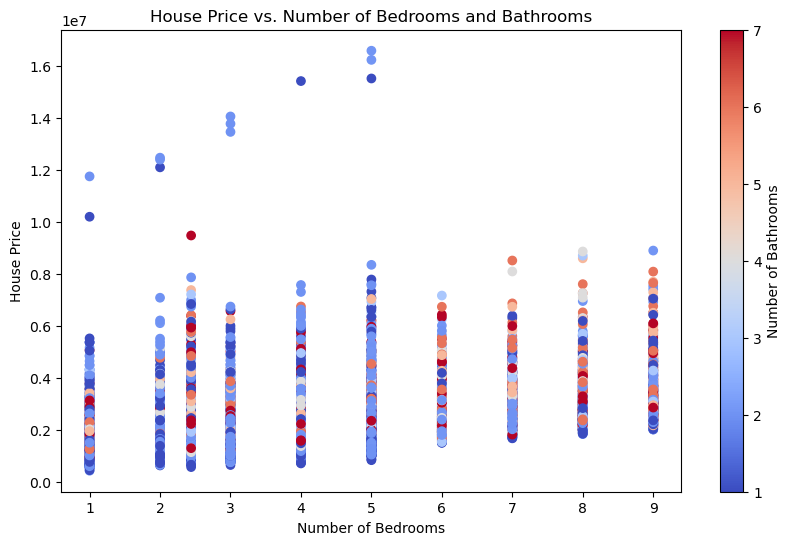

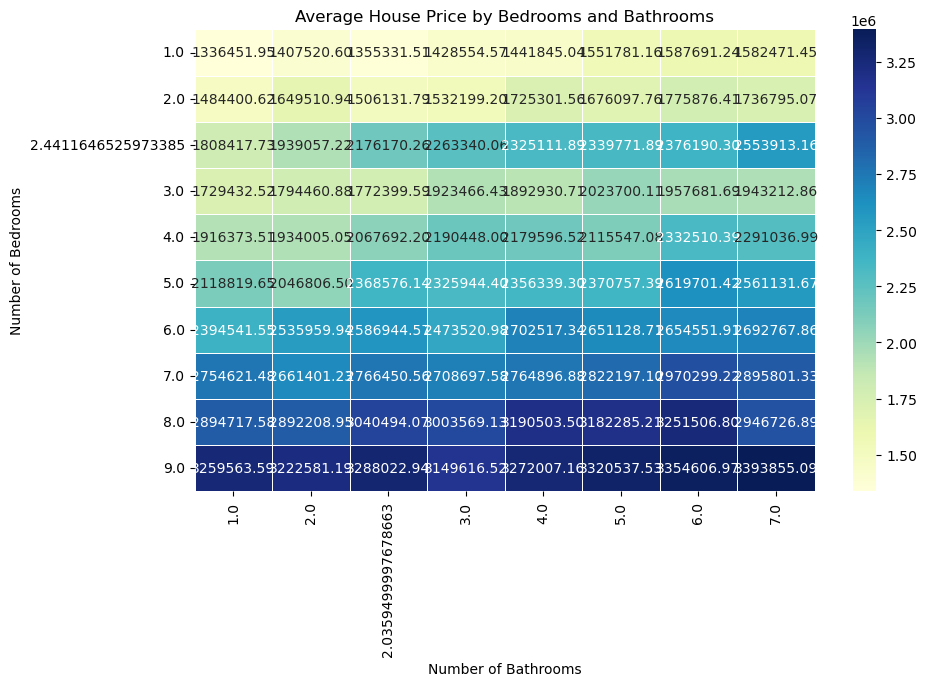

In [35]:
#How does the house price vary with the number of bedrooms and bathrooms?

#Construct a heatmap and scatter plot to visualize the relationship 

plt.figure(figsize=(10, 6))
plt.scatter(train['bedroom'], train['price'], c=train['bathroom'], cmap='coolwarm') #scatter plots
plt.colorbar(label='Number of Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('House Price vs. Number of Bedrooms and Bathrooms')
plt.show()

heatmap_data = train.pivot_table(index='bedroom', columns='bathroom', values='price', aggfunc='mean') #Create a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Bedrooms')
plt.title('Average House Price by Bedrooms and Bathrooms')
plt.show()


In [36]:
#State with the highest median house price 
Median_house_price_per_state = train.groupby(['loc'])['price'].median() 
Median_house_price_per_state

loc
Abia           1.591204e+06
Adamawa        1.743061e+06
Akwa Ibom      2.434762e+06
Anambra        2.098878e+06
Bauchi         1.582657e+06
Bayelsa        2.769760e+06
Benue          1.754722e+06
Borno          1.513334e+06
Cross River    2.207716e+06
Delta          2.358933e+06
Ebonyi         1.477938e+06
Edo            1.986345e+06
Ekiti          1.908271e+06
Enugu          2.031454e+06
Gombe          1.652205e+06
Imo            1.808759e+06
Jigawa         1.659342e+06
Kaduna         1.669671e+06
Kano           1.917825e+06
Katsina        1.785143e+06
Kebbi          1.539701e+06
Kogi           1.639853e+06
Kwara          1.713635e+06
Lagos          3.716567e+06
Nasarawa       1.841081e+06
Niger          1.683201e+06
Ogun           2.323711e+06
Ondo           2.083145e+06
Osun           1.934985e+06
Oyo            1.983255e+06
Plateau        1.795576e+06
Rivers         2.486950e+06
Sokoto         1.603510e+06
Taraba         1.732256e+06
Yobe           1.610075e+06
Zamfara        1

In [37]:
State_with_the_highest_median_house_price = Median_house_price_per_state.idxmax() #estimate the state with the highest median price 
State_with_the_highest_median_house_price

'Lagos'

What are the top 5 most expensive house types in the dataset? 

In [38]:
house_type_by_price = train.groupby(['title'])['price'].mean()
house_type_by_price

title
Apartment               1.639514e+06
Bungalow                1.786781e+06
Cottage                 1.452327e+06
Detached duplex         2.196736e+06
Flat                    1.767734e+06
Mansion                 3.535813e+06
Penthouse               2.579411e+06
Semi-detached duplex    1.960492e+06
Terrace duplex          1.960049e+06
Townhouse               2.061880e+06
Name: price, dtype: float64

In [39]:
Five_most_expensive_houses = house_type_by_price.sort_values(ascending = False).head(5)
print('The top 5 most expensive houses are: ')
print(Five_most_expensive_houses)

The top 5 most expensive houses are: 
title
Mansion                 3.535813e+06
Penthouse               2.579411e+06
Detached duplex         2.196736e+06
Townhouse               2.061880e+06
Semi-detached duplex    1.960492e+06
Name: price, dtype: float64


Is there a correlation between the number of bedrooms and the number of bathrooms?

In [40]:
bathroom = train['bathroom']
bedroom = train['bedroom']

correlation = bedroom.corr(bathroom)
print('The correlation between bathroom and bedroom is: ') 
print(correlation)

The correlation between bathroom and bedroom is: 
0.17994629315552169


The correlation between bathroom and bed =room isvery week. Nothing close to one. 

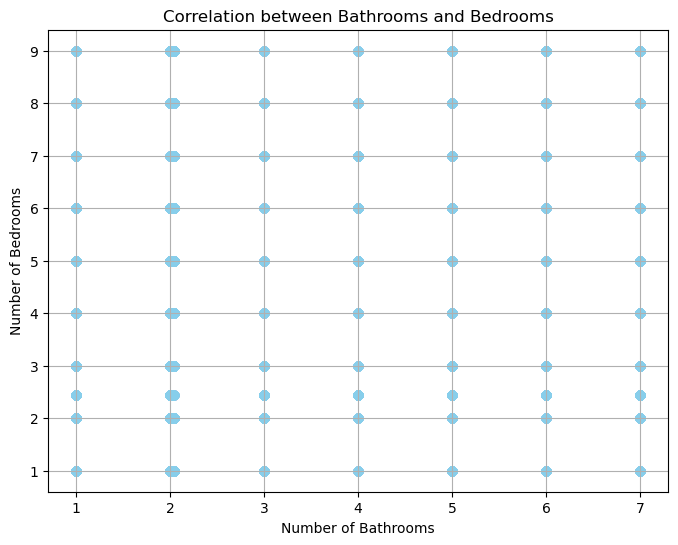

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(bathroom, bedroom, color='skyblue', alpha=0.7)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Bedrooms')
plt.title('Correlation between Bathrooms and Bedrooms')
plt.grid(True)
plt.show()

What is the average number of bedrooms for each house type?


In [42]:
average_no_of_bathroom_per_house = train.groupby(['title'])['bathroom'].mean()
average_no_of_bathroom_per_house 

title
Apartment               2.987050
Bungalow                3.143663
Cottage                 1.828300
Detached duplex         3.075096
Flat                    3.060971
Mansion                 3.032464
Penthouse               2.869405
Semi-detached duplex    3.016472
Terrace duplex          3.147262
Townhouse               3.005303
Name: bathroom, dtype: float64

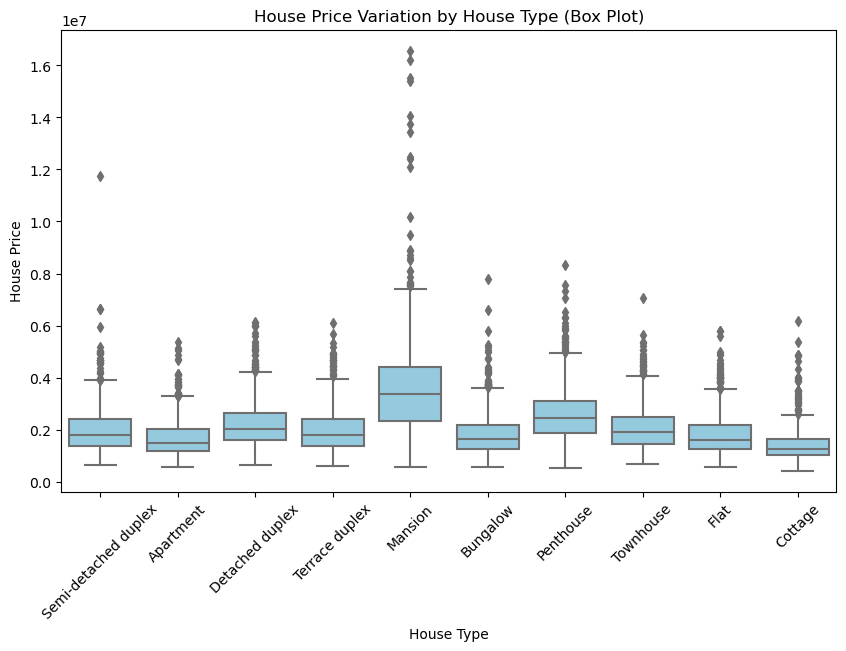

In [43]:
# Create a box plot to visualize the variation of house price with different house types
plt.figure(figsize=(10, 6))
sns.boxplot(x='title', y='price', data=train, color='skyblue')
plt.xlabel('House Type')
plt.ylabel('House Price')
plt.title('House Price Variation by House Type (Box Plot)')
plt.xticks(rotation=45)
plt.show()

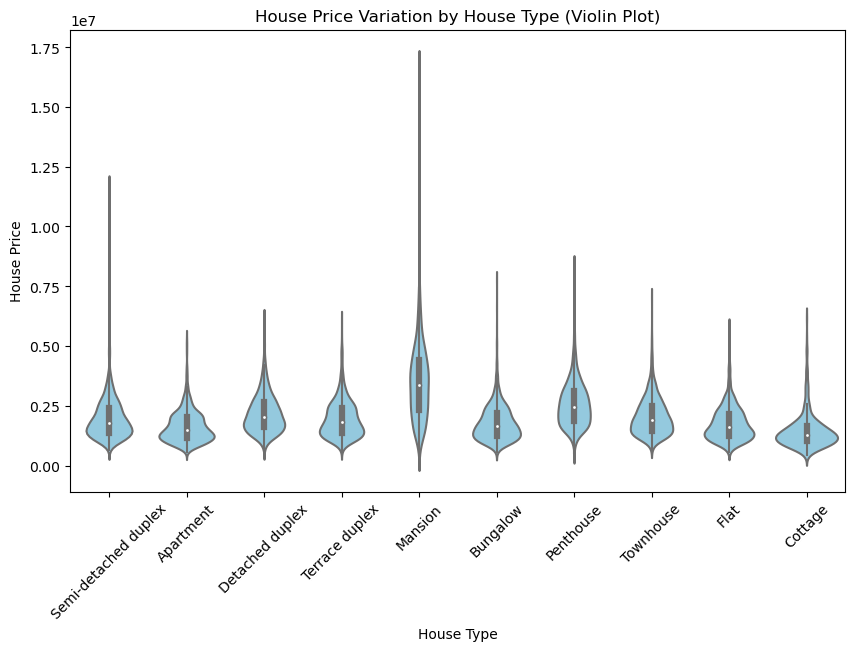

In [44]:
# or we can also visualize the relationship with violin plot. 
#Create a violin plot to visualize the variation of house price with different house types
plt.figure(figsize=(10, 6))
sns.violinplot(x='title', y='price', data=train, color='skyblue')
plt.xlabel('House Type')
plt.ylabel('House Price')
plt.title('House Price Variation by House Type (Violin Plot)')
plt.xticks(rotation=45)
plt.show()